Listen, there are so many good kernels out there which are well-written, easy to understand and even getting higher scores for this competition much better than what I have done here. So, don't consider this kernel as a comprehensive informative kernel on titanic dataset.
But, what I'm trying to demonstrate here is only a playground of my understanding of data analysis techniques and Machine Learning algorithms and trying to explain and share it with others. So, if what I mentioned doesn't bother you, keep reading my kernel and make me much happier by giving me back some feedback or comments.

What we're going to do is simply, loading the dataset, clean it, preprocess it, visualise it, making some hypothesis and then constructing our models.

In [208]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Configuring plotting visual and sizes
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

# tools libraries
import random
import math

# Scientific packages
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

We'll use pandas to load CSV file as a convenient way for importing and converting data into data frame.

In [209]:
# Load the datasets
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')

# Check datasets dimensions
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


In [210]:
# Take a look to the first few rows of training dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


For the sake of simplicity in making modification on datasets, we are going to merge train and test datasets into full dataset and when we made all the data wrangling changes and right before making models, we again divide it into train and test datasets.

In [211]:
# Filling Survived column with 0s as a placeholder in test dataset
test_df['Survived'] = 0

# merge two dataset in order to construct full dataset
full = pd.concat([train_df, test_df], 
                 axis=0, # merge on rows
                 ignore_index=True, 
                 sort=False)

In [212]:
# Check dataset again
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


That's just me or some column names are not very readable, let's fix them first:

In [213]:
# Renaming dataset columns to increase readbility
full.rename(columns={'Pclass':'TicketClass',
                     'SibSp':'Sibling_Spouse',
                     'Parch':'Parent_Children',
                     'Fare':'TicketFare'}, 
            inplace=True)  # Apply changes on the dataset

In order to understand dataset better and having a view of how numerical columns are spread or how categorical columns are used we can use following snippets:

In [214]:
# Checking all columns for missed values and types
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId        1309 non-null int64
Survived           1309 non-null int64
TicketClass        1309 non-null int64
Name               1309 non-null object
Sex                1309 non-null object
Age                1046 non-null float64
Sibling_Spouse     1309 non-null int64
Parent_Children    1309 non-null int64
Ticket             1309 non-null object
TicketFare         1308 non-null float64
Cabin              295 non-null object
Embarked           1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [215]:
# Checking numerical columns
full.describe()

,PassengerId,Survived,TicketClass,Age,Sibling_Spouse,Parent_Children,TicketFare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.261268,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.439494,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


* ** 75%** of the passengers having age less than 39 and 50% of them having age between **21** to **39**.
* Average ticket fare was around **33** despite having some passenger paid as high as **512**.
* More than **75%** of passengers travelling without their parents or children.

In [216]:
# Checking categorical columns
full.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


* We have two groups consists of two persons each with exact same name **Kelly, Mr. James** and **Connolly, Miss. Kate** but different age and embarked in different locations. 

In [217]:
full[full.Name.isin(['Connolly, Miss. Kate','Kelly, Mr. James'])].sort_values(by='Name')

,PassengerId,Survived,TicketClass,Name,Sex,Age,Sibling_Spouse,Parent_Children,Ticket,TicketFare,Cabin,Embarked
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
897,898,0,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
696,697,0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
891,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


Here, we're going to depict frequency of survivals based on some selected columns:

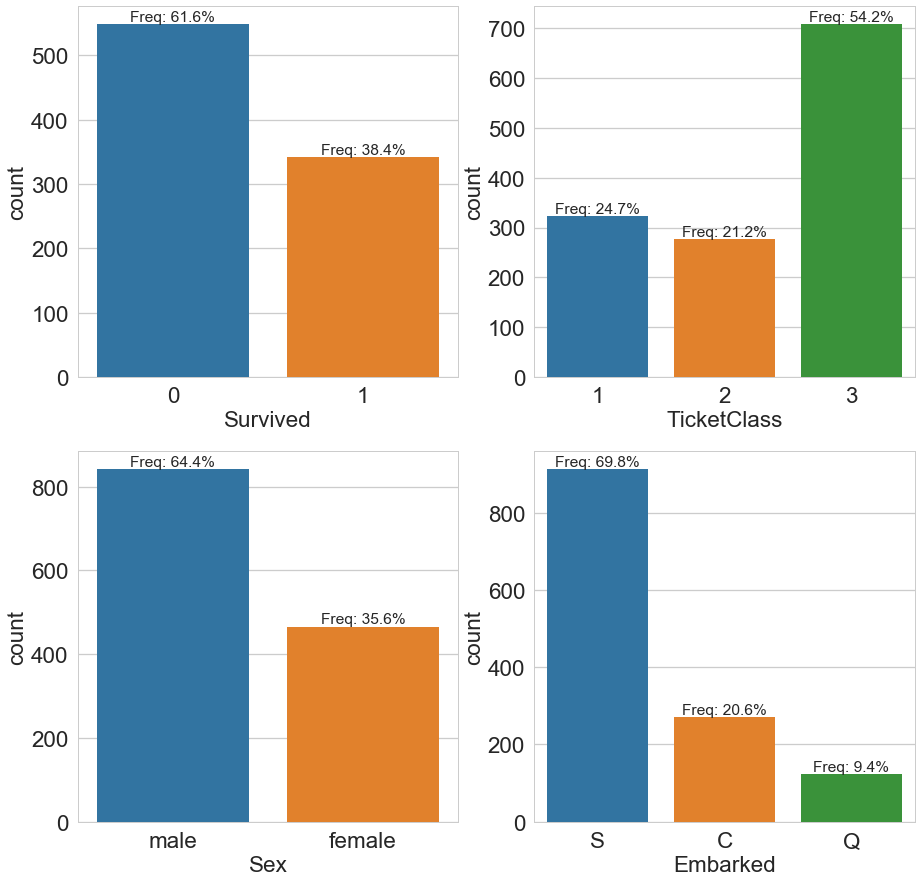

In [218]:
# Make a plot instance 
fig, axes = plt.subplots(2,2,figsize=(15,15))

# Drawing plots
sns.countplot(data=train_df, x='Survived', ax=axes[0][0])
sns.countplot(data=full, x='TicketClass', ax=axes[0][1])
sns.countplot(data=full, x='Sex', ax=axes[1][0])
sns.countplot(data=full, x='Embarked', ax=axes[1][1])

# showing frequency percentage on top of each column
for ax in axes.flatten():
    total = len(full) if ax.get_xlabel() != 'Survived' else len(train_df)
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('Freq: {:.1f}%'.format(100.*y/total), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text

* Only around **39%** survived :( 
* Not surprisingly, more than **54%** of tickets are 3rd class.
* Passengers are mostley gentlemen by having around **64%** of all passengers.
* The thing which we work on soon is, around **70%** of passengers embarked at Southampton. We'll check socio-economic status of Southampton passengers and trying to find some relation between survivors and their port of embarkation. 



Making some simple analysis for survivals:

In [219]:
full.loc[:891,['TicketClass', 'Survived']]\
.groupby(['TicketClass'], as_index=False)\
.mean().sort_values(by='Survived', 
                    ascending=False)

,TicketClass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.241870


* Around **63%** of survivals have 1st class ticket.

In [220]:
full.loc[:891,['Sex', 'Survived']]\
.groupby(['Sex'], as_index=False).mean()\
.sort_values(by='Survived', 
             ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188581


* Around **74%** of all survivals are female and only **19%** are male.

In [221]:
full.loc[:891,['Embarked', 'Survived']]\
.groupby(['Embarked'], as_index=False).mean()\
.sort_values(by='Survived', 
             ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.384615
2,S,0.336957


* Only a bit more than half of Southampton port (the most crowded port between all three ports) survived.

Maybe it would be a better idea if we visualise them in graphs:

For example, can we say passengers who were richer than others mostly survived? 

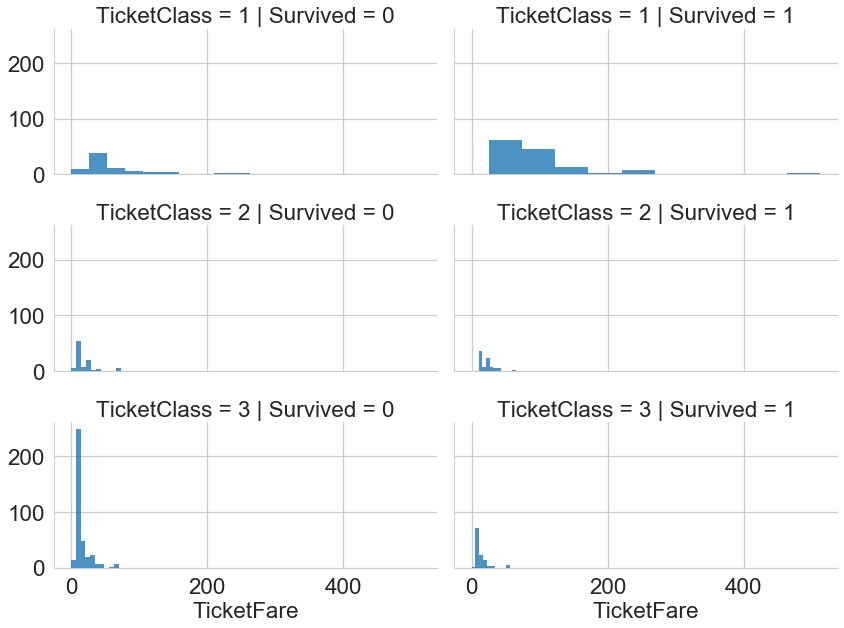

In [222]:
grid = sns.FacetGrid(full.loc[:891], 
                     col='Survived', 
                     row='TicketClass',
                     aspect=2)
grid.map(plt.hist, 'TicketFare', alpha=0.8)

Yes, as we can clearly see in the right columns, passengers which paid more than regular fare had more chance to survive, MONEY!! Last row doesn't indicate any difference since there are a few third class passenger how paid more than regular price.

Let's see how is percentage of survivals in various ages and genders:

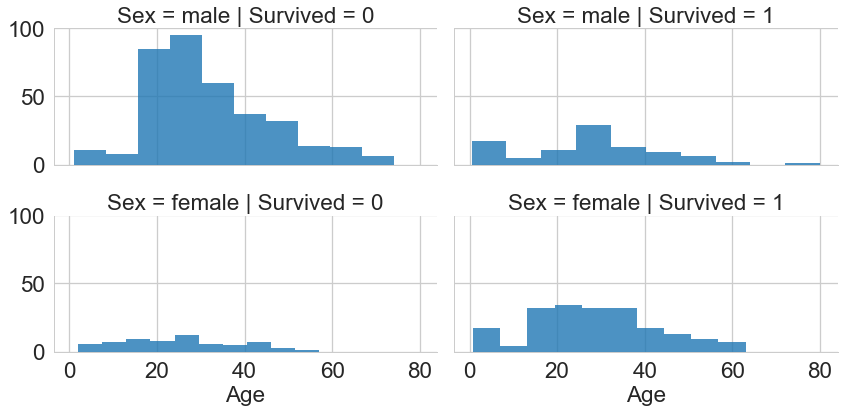

In [223]:
grid = sns.FacetGrid(full.loc[:891], 
                     col='Survived', 
                     row='Sex',
                     aspect=2)

grid.map(plt.hist, 'Age', alpha=.8)

In total, we can say mid age men had more fatalities compare to others. 

Ok, let's move on and try a bit to clean up datasets and doing some **Feature Engineering**:
Between the columns of dataset it seems ``cabin``, ``ticket`` and ``PassengerId`` columns are kinda useless, so we can start by dropping them:

In [224]:
# Getting rid of useless columns
full.drop(['Cabin','Ticket','PassengerId'], 
          axis=1, # Drop column
          inplace=True)

Working on title of the passengers and its relation with being survived.

In [225]:
# Extracting titles out of names
full['Title'] = full['Name'].str.extract('([A-Za-z]+)\.', 
                                         expand=False)
    
# Making a cross-table of Titles and their gender
title_cross = pd.crosstab(full['Title'], 
                          full['Sex'])

title_cross

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


There are so many rare titles, we can replace them with most common ones:

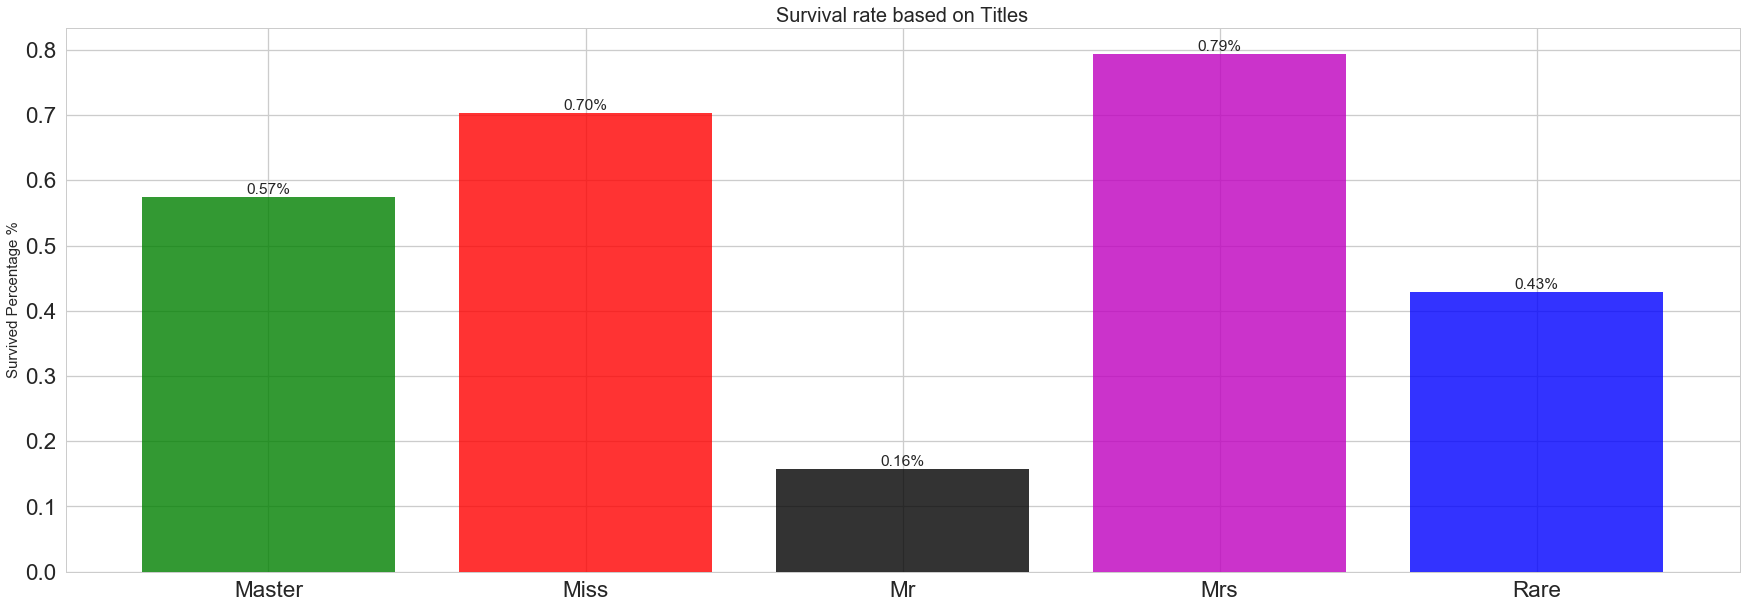

In [226]:
# Transforming less regular titles to more regulars.
full.Title.replace(['Col','Rev','Sir'],
                   'Mr',
                   inplace=True)

full.Title.replace(['Ms','Mlle'],
                   'Miss',
                   inplace=True)

full.Title.replace('Mme',
                   'Mrs',
                   inplace=True)


# Convert remaining titles as Rare
full.Title.replace([x for x in list(np.unique(full.Title)) \
                    if x not in ['Mr','Miss','Mrs','Master']] ,
                   'Rare',
                   inplace=True)
    
title_report = full.loc[:891,['Title','Survived']]\
.groupby('Title',
         as_index=False).mean()

# Visualization
plt.bar(x=title_report['Title'], 
        height=title_report['Survived'],
        alpha=0.8,color='grkmb')

plt.title('Survival rate based on Titles',
          fontsize=20)
plt.ylabel('Survived Percentage %',
           fontsize=15)

# showing frequency percentage on top of each column
ax = plt.gca()
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}%'.format(y), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

Alright, let's see what we learned so far:
* **57%** of passengers with `Master` title survived, in contrast, only **16%** of `Mr.` could help themselves. MONEY!!
* There is a slight difference in the percentage of survivals in the female group, **70%** for `Miss` and **79%** for `Mrs.` Thank you gentlemen!

We are all done with ``Name`` column and we can drop it too: 

In [227]:
# Getting rid of useless columns
full.drop(['Name'], axis=1, inplace=True)

Maybe, here would be a right place to checking for columns with **missing values** before moving any further. 

In [228]:
# Checking for columns with NAs
full.isnull().sum()

Survived             0
TicketClass          0
Sex                  0
Age                263
Sibling_Spouse       0
Parent_Children      0
TicketFare           1
Embarked             2
Title                0
dtype: int64

Let's work on `Embarked` and `TicketFare` first, we can easily fill them with more frequent values for categorical values or mean of column for numerical one.

In [229]:
# Filling NAs in Embarked with the most frequent value.
full.loc[full['Embarked'].isnull(),'Embarked'] = \
full['Embarked'].dropna().mode()[0]

In [230]:
# Filling missed value for ticket fare by mean of the column
full.loc[full['TicketFare'].isnull(),'TicketFare'] = \
full['TicketFare'].dropna().mean()

The next thing we can work on would be ``Age`` column. First, we need to work on missed values and then using techniques like continuous values binning in order to prepare them for modeling:

In [231]:
# First see how many missed value we have in Age column
full.Age.isnull().sum()

263

**263** looks like a high volume for missing value for a particular column in this dataset. In order to fill NAs we need a more clever approach to have some guess reasonably close to the actual age of passenger by considering other columns in the dataset. One way would be checking the correlation between Age and other columns:

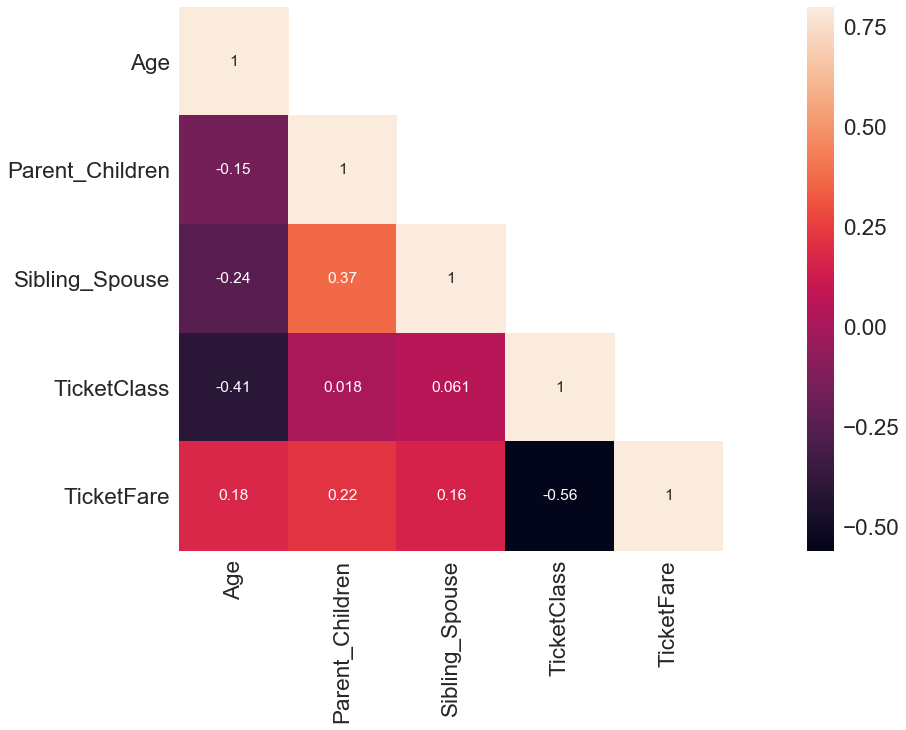

In [232]:
# Making correlation matrix of all columns except Survived
corrMatt = full[full.columns.difference(['Survived'])].corr()
mask = np.array(corrMatt)

# Turning the lower-triangle of the array to false
mask[np.tril_indices_from(mask)] = False

# Making the heatmap of correlations
fig,ax = plt.subplots()
sns.heatmap(corrMatt, 
            mask=mask,
            vmax=.8, 
            square=True,
            annot=True,
            ax=ax)

Based on the heatmap, we can see there are some notable correlation between `Age` and `TicketClass` and followed by `Sibling_Spouse`. We'll use all of those columns for making guess for missing ages: 

In [233]:
# Finding mean and standard deviation for age of passengers 
age_estimator = full[['Age','TicketClass','Sibling_Spouse']]\
.groupby(['TicketClass','Sibling_Spouse']).agg(['mean','std'])

# Filling the NAs by making random numbers around their group mean
age_nulls = full.loc[full.Age.isnull(),:]

for idx,rec in age_nulls.iterrows():
    # For each null age calculating a random age based on correlated Ticketclass and Sibling_Spouse columns
    mean = age_estimator.loc[(rec['TicketClass'],rec['Sibling_Spouse']),('Age','mean')]
    std = age_estimator.loc[(rec['TicketClass'],rec['Sibling_Spouse']),('Age','std')]
    gen_age = random.uniform(mean-std, mean+std)
    
    # Convert negative ages to 1
    full.loc[idx,'Age'] = gen_age if gen_age >= 1 else 1

# Transform ages value to upper integer value
full['Age'] = full['Age'].apply(math.ceil)

Ok, what we have done above is, first we look for all the rows in the dataframe which has NA as value for age column. Then we calculate mean and std for groups like them by having same `TicketClass` and `Sibling_Spouse` and based on that we produce a random number for age and fill the NAs with it. 

In [234]:
# Just to make sure there is no more NAs in Age column
full.Age.isnull().sum()

0

Often when working with numeric data, we might come across features or attributes which depict raw measures such as values or frequencies. In many cases, often the distributions of these attributes are skewed in the sense that some sets of values will occur a lot and some will be very rare. Besides that, there is also the added problem of varying range of these values. Consider `Age` and `TicketFare` in our dataset.

In some cases, the view counts will be abnormally large and in some cases very small. Directly using these features in modeling might cause issues. Metrics like similarity measures, cluster distances, regression coefficients and more might get adversely affected if we use raw numeric features having values which range across multiple orders of magnitude. There are various ways to engineer features from these raw values so we can these issues. One method would be **binning**.

 The operation of binning is used for transforming continuous numeric values into discrete ones. These discrete numbers can be thought of as bins into which the raw values or numbers are binned or grouped into. Each bin represents a specific degree of intensity and has a specific range of values which must fall into that bin. 
 
 Before applying that technique to our dataset, we are going to make a visualization of distribution of these two columns.

In [235]:
full[['Age', 'TicketFare']].describe()

,Age,TicketFare
count,1309.000000,1309.000000
mean,29.444614,33.295479
std,13.652895,51.738879
min,1.000000,0.000000
25%,21.000000,7.895800
50%,28.000000,14.454200
75%,37.000000,31.275000
max,80.000000,512.329200


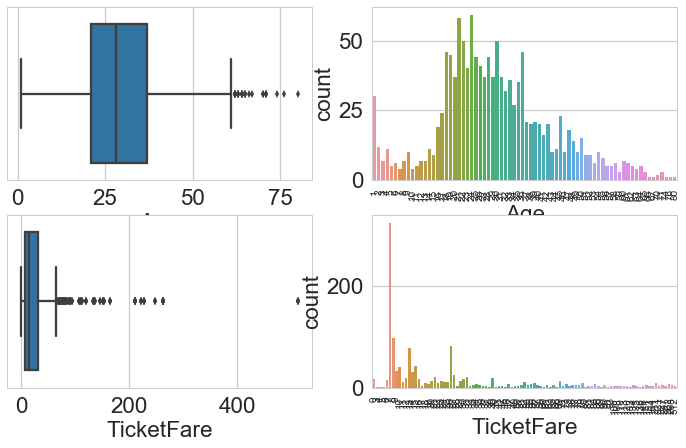

In [236]:
# Making subplots axes
fig, axes = plt.subplots(2,2,figsize=(12,7))

sns.boxplot(data=full, 
            x='Age', 
            ax=axes[0][0])

sns.countplot(data=full, 
              x='Age', 
              ax=axes[0][1])

sns.boxplot(data=full, 
            x='TicketFare', 
            ax=axes[1][0])

sns.countplot(data=full[['TicketFare']].astype(int), # Only for having less bars
              x='TicketFare', 
              ax=axes[1][1])

# Adjusting xlabelticks to make them more readble
for ax in [axes[0][1],axes[1][1]]:
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90,fontdict={'fontsize':10})

As we can clearly see, both columns values are skewed and in the case of `TicketFare` there are varied values. So, binning could be a right choice to apply. We start with age and try to transform it into discrete meaningful values and then we apply appropriate ranges for ticket fares.

In [237]:
# Defining age ranges
age_bin = [0,2,15,40,55,80]

# Set label for age ranges
age_bin_labels = ['infant','kid','young','mid-age','old']

# Overide numeriuous age value with discrete bins
full['Age'] = pd.cut(np.array(full['Age']), 
                     bins=age_bin, 
                     labels=age_bin_labels)

# Checking value counts in each new generated age range
full.Age.value_counts().sort_values()

infant      42
old         59
kid         93
mid-age    189
young      926
Name: Age, dtype: int64

But why we did such a thing! what was wrong with the continuous value of age and why we convert them to the age bin. Listen, what will be our ultimate goal! predicting the passengers who survived, right! and to reach our goal we are going to construct models which are using all the independent values including Age to predict the outcome. If we think about situations like titanic tragedy, probably we can make some guesses like how cruise crews decided who should get into rescue boats first, most probably infants, right. By this point of view, it couldn't be a significant difference for people in the same range ages. Maybe young people could help themselves but would be a little chance for elders.

We can use the same technique and apply it on `TicketFare` column. It shouldn't be a large difference for a passenger which paid 35 for ticket with one which paid 36 or 37, right?. 
The slight difference in the case of `TicketFare` is, we saw how skewed data distribution is and if we want to bin it as what we've done for age (even size bins), we will end up with bins which might be densely populated (e.g. around bin which contains values around 35), and some bins might be sparsely populated (e.g. bins of values bigger than 300).

**Adaptive binning** is a safer and better approach where we use the data distribution itself to decide what should be the appropriate bins.

**Quantile** based binning is a good strategy to use for adaptive binning. Quantiles are specific values or cut-points which help in partitioning the continuous values distribution of a specific numeric field into discrete contiguous bins or intervals.

Ticket fare varies from 0! to 512, let's take a 3-Quantile quartile based adaptive binning scheme:

0.000000      0.0000
0.333333      8.6625
0.666667     26.0000
1.000000    512.3292
Name: TicketFare, dtype: float64


Text(0,0.5,'Frequency')

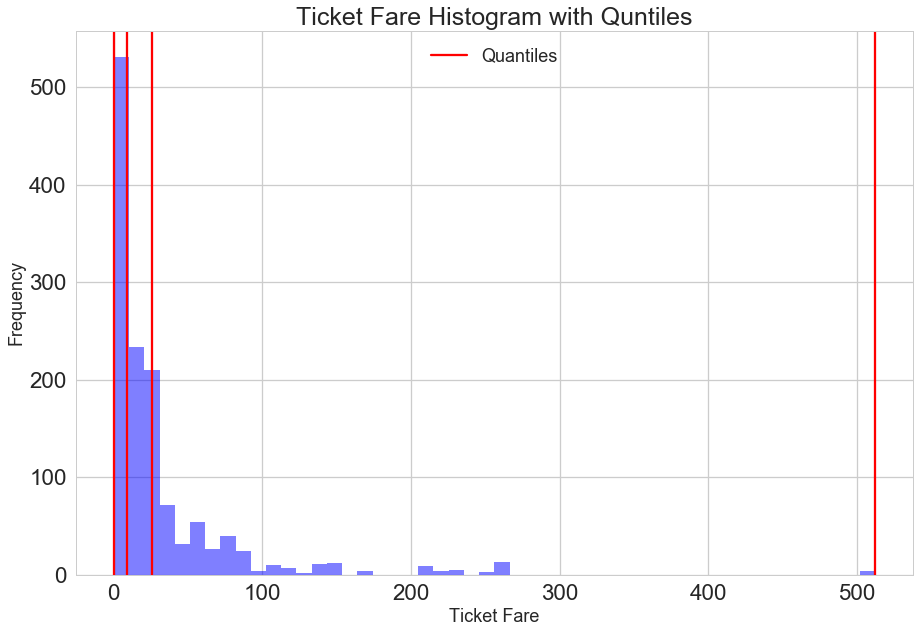

In [238]:
# we need to have 3 quantiles
quantile_list = np.linspace(0,1,4,endpoint=True)

# Finding quiatiles in data
fare_quantiles = full['TicketFare'].quantile(quantile_list)
print(fare_quantiles)

# Visualise the binning
fig, ax = plt.subplots(figsize=(15,10))

full[['TicketFare']].astype(int).hist(bins=50,
                                      color='b',
                                      alpha=.5,
                                      ax=ax)

# Drawing quantile lines in red over the histogram
for q in fare_quantiles:
    qvl = plt.axvline(q,color='r')
    
ax.legend([qvl],['Quantiles'],fontsize=18,loc='upper center')
ax.set_title('Ticket Fare Histogram with Quntiles', fontsize=25)
ax.set_xlabel('Ticket Fare', fontsize=18)
ax.set_ylabel('Frequency', fontsize=18)

In [239]:
# Using qunatile binning to bin each each of passenger ticket fare
quantile_label = ['Cheap','Regular','Premium']
full['TicketFare'] = pd.qcut(full['TicketFare'],
                             q=quantile_list,
                             labels=quantile_label)

full.TicketFare.value_counts().sort_values()

Premium    427
Regular    428
Cheap      454
Name: TicketFare, dtype: int64

Let's take a look again to the dataset after making recent changes:

In [240]:
full.head()

,Survived,TicketClass,Sex,Age,Sibling_Spouse,Parent_Children,TicketFare,Embarked,Title
0,0,3,male,young,1,0,Cheap,S,Mr
1,1,1,female,young,1,0,Premium,C,Mrs
2,1,3,female,young,0,0,Cheap,S,Miss
3,1,1,female,young,1,0,Premium,S,Mrs
4,0,3,male,young,0,0,Cheap,S,Mr


The other feature engineering which we can make would be identifying solo-travellers and Family-travelers as well as family size in the latter case. Based on same reason as what we have done we age column, we are going to use the same approach for `Sibling_Spouse` and `Parent_Children` columns. Perhaps knowing the value of those columns separately doesn't help that much for predicting survival status, but trying to figure out the whole onboard family size of passenger give us a better indication.

In [241]:
# Calculating family size for each passenger
full['FamilySize'] = full['Sibling_Spouse'] + \
                     full['Parent_Children'] + \
                     1 # include the passeger itself

In [242]:
# Adding a new column for indicating solo-travellers
full.loc[full.FamilySize > 1, 'IsAlone'] = 0
full.loc[full.FamilySize <= 1, 'IsAlone'] = 1
full['IsAlone'] = full['IsAlone'].astype(int)

In [243]:
full.loc[:891,['FamilySize','Survived']]\
.groupby(['FamilySize'],as_index=False)\
.mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.302974
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


Interestingly, passengers who were members of a family in 4, had a chance to survive around **73%**.

In [244]:
full.loc[:891,['IsAlone','Survived']].groupby(['IsAlone'],as_index=False)\
.mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.302974


Moreover, a really little chance for solo-travelers, only **30%**.

In [245]:
# Dropping unnecessary columns after these columns engineerings
full.drop(['Sibling_Spouse','Parent_Children'], axis=1, inplace=True)

In [246]:
# Check dataset again
full.sample(10)

,Survived,TicketClass,Sex,Age,TicketFare,Embarked,Title,FamilySize,IsAlone
734,0,2,male,young,Regular,S,Mr,1,1
1048,0,3,female,young,Cheap,S,Miss,1,1
511,0,3,male,young,Cheap,S,Mr,1,1
264,0,3,female,young,Cheap,Q,Miss,1,1
168,0,1,male,young,Regular,S,Mr,1,1
467,0,1,male,old,Premium,S,Mr,1,1
693,0,3,male,young,Cheap,C,Mr,1,1
1045,0,3,male,kid,Premium,S,Master,7,0
1179,0,3,male,young,Cheap,C,Mr,1,1
183,1,2,male,infant,Premium,S,Master,4,0


So far, we have been working on continuous numeric data and you have also seen various techniques for engineering features from the same. We will now look at another structured data type, which is categorical data. Any attribute or feature that is categorical in nature represents discrete values that belong to a specific finite set of categories or classes. Category or class labels can be text or numeric in nature. Usually, there are two types of categorical variables—**nominal** and **ordinal**.

Nominal categorical features are such that there is *no concept of ordering among the values*, i.e., it does not make sense to sort or order them. Features like, `Sex`, `Embarked` and `Title` are some examples of nominal attributes. Ordinal categorical variables can be ordered and sorted on the basis of their values and hence these values have specific significance such that their order makes sense. Examples of ordinal attributes in our dataset are:  `Age` and `TicketFare`.

We will start with nominal features. We can do it either manually by just mapping categories to numeric values or using **scikit-learn** labelEncoder method.

In [247]:
for nom_feature in ['Sex','Embarked','Title']:
    gle = LabelEncoder()
    labels = gle.fit_transform(full[nom_feature])
    report = {index: label for index,label in enumerate(gle.classes_)}
    full[nom_feature] = labels
    print(nom_feature,':',report,'\n','-'*50)

Sex : {0: 'female', 1: 'male'} 
 --------------------------------------------------
Embarked : {0: 'C', 1: 'Q', 2: 'S'} 
 --------------------------------------------------
Title : {0: 'Master', 1: 'Miss', 2: 'Mr', 3: 'Mrs', 4: 'Rare'} 
 --------------------------------------------------


Now we can deal with Ordinal features. Ordinal features are similar to nominal features except that order matters and is an inherent property with which we can interpret the values of these features.

Unfortunately, since there is a specific logic or set of rules involved in case of each ordinal variable, there is no generic module or function to map and transform these features into numeric representations. Hence we need to hand-craft this using our own logic, which is depicted in the following code snippet.

In [248]:
# Mapping ordinal values in Age column
age_ord_map = {'infant':0, 'kid':1, 'young':2, 'mid-age':3, 'old':4}
full.Age = full.Age.map(age_ord_map)

# Mapping ordinal values in TicketFare column
tf_ord_map = {'Cheap':0, 'Regular':1, 'Premium':2}
full.TicketFare = full.TicketFare.map(tf_ord_map)

In [249]:
# Checking dataset
full.head(10)

,Survived,TicketClass,Sex,Age,TicketFare,Embarked,Title,FamilySize,IsAlone
0,0,3,1,2,0,2,2,2,0
1,1,1,0,2,2,0,3,2,0
2,1,3,0,2,0,2,1,1,1
3,1,1,0,2,2,2,3,2,0
4,0,3,1,2,0,2,2,1,1
5,0,3,1,2,0,1,2,1,1
6,0,1,1,3,2,2,2,1,1
7,0,3,1,0,1,2,0,5,0
8,1,3,0,2,1,2,3,3,0
9,1,2,0,1,2,0,3,2,0


We have mentioned several times in the past that Machine Learning algorithms usually work well with **numerical values**. You might now be wondering we already transformed and mapped the categorical variables into numeric representations in the previous sections so why would we need more levels of encoding again? The answer to this is pretty simple. If we directly fed these transformed numeric representations of categorical features into any algorithm, the model will essentially try to interpret these as raw numeric features and hence the **notion of magnitude** will be wrongly introduced in the system.

There are several schemes and strategies where dummy features are created for each unique value or label out of all the distinct categories in any feature. We are going to use a method which is called **One Hot Encoding Scheme**.

Considering we have numeric representation of any categorical feature with m labels, the one hot encoding scheme, encodes or transforms the feature into m binary features, which can only contain a value of 1 or 0. Each observation in the categorical feature is thus converted into a vector of size m with only one of the values as 1 (indicating it as active).

In [250]:
# encode all the categorical features using one-hot encoding scheme
list_category_features = ['TicketClass',
                          'Sex',
                          'Age',
                          'TicketFare',
                          'Embarked',
                          'Title']
dummy_features = pd.get_dummies(full[list_category_features], columns=list_category_features)

# Drop all the features before transforming to dummy variables
full.drop(list_category_features, axis=1,inplace=True)

# Merging remaining columns with dummy variables
full = pd.concat([full, dummy_features], axis=1)

# Checking dataset
full.sample(10)

,Survived,FamilySize,IsAlone,TicketClass_1,TicketClass_2,TicketClass_3,Sex_0,Sex_1,Age_0,Age_1,...,TicketFare_1,TicketFare_2,Embarked_0,Embarked_1,Embarked_2,Title_0,Title_1,Title_2,Title_3,Title_4
819,0,6,0,0,0,1,0,1,0,1,...,0,1,0,0,1,1,0,0,0,0
48,0,3,0,0,0,1,0,1,0,1,...,1,0,1,0,0,0,0,1,0,0
517,0,1,1,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
232,0,1,1,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
824,0,6,0,0,0,1,0,1,1,0,...,0,1,0,0,1,1,0,0,0,0
924,0,4,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
1131,0,1,1,1,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
895,0,3,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
881,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
741,0,2,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


## Modeling

Models can be differentiated on a variety of categories and nomenclatures. A lot of this is based on the learning algorithm or method itself, which is used to build the model. Examples can be the model is linear or nonlinear, what is the output of model, whether it is a parametric model or a non-parametric model, whether it is supervised, unsupervised, or semi-supervised, whether it is an ensemble model or even a Deep Learning based model.
In our case what we already now is the problem would be a **Logistic Regression** or/and **Classification**, moreover because of having labeled data we know that we're dealing with **Supervised learning**. By having these information we can pick some of the related models and evaluate each of them in order to making best model.


In [251]:
train_df_new = full.iloc[:891]
y = train_df_new['Survived']
X = train_df_new.drop(['Survived'], axis=1)

test_df_new = full.iloc[891:]
test_df_new = test_df_new.drop(['Survived'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42) 
print(X_train.shape, X_test.shape)

(623, 23) (268, 23)


Now, we are going to try couple of models which could work on our problem:

We will start with Logistic Regression and we'll discuss about how to evaluate model and get reports then picking better models and tuning them.

**Logistic Regression**:
Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [252]:
# train and build the model
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

# Make the prediction values
y_pred = logistic.predict(X_test)

# Checking model score
print('Logistic Regression model score:',
      np.round(logistic.score(X_test, y_test), 3))

Logistic Regression model score: 0.843


#### Evaluate model:



**Confusion matrix** is one of the most popular ways to evaluate a classification model. Although the matrix by itself is not a metric, the matrix representation can be used to define a variety of metrics, all of which become important in some specific case or scenario. A confusion matrix can be created for a binary classification as well as a multi-class classification model.


**Accuracy**: This is one of the most popular measures of classifier performance. It is defined as the overall accuracy or proportion of correct predictions of the model.
`NOTE`: Scikit-learn's models score method are representing model accuracy. 

**Precision**: Precision, also known as positive predictive value, is another metric that can be derived from the confusion matrix. It is defined as the number of predictions made that are actually correct or relevant out of all the predictions based on the positive class.


**Recall**: Recall, also known as sensitivity, is a measure of a model to identify the percentage of relevant data points. It is defined as the number of instances of the positive class that were correctly predicted.

**F1 Score**: There are some cases in which we want a balanced optimization of both precision and recall. F1 score is a metric that is the harmonic mean of precision and recall and helps us optimize a classifier for balanced precision and recall performance.

In [253]:
def model_report(y_test, y_pred):
    print('Confusion Matrix:\n',
          metrics.confusion_matrix(y_true=y_test,
                                   y_pred=y_pred,
                                   labels=[0, 1]))
    print('{:-^30}'.format('|'))

    print('{:15}{:.3f}'.format('Accuracy:', 
          metrics.accuracy_score(y_test,
                                 y_pred)))

    print('{:-^30}'.format('|'))

    print('{:15}0:{:.3f}|1:{:.3f}'.format('Precision:', 
          metrics.precision_score(y_test,y_pred,average=None)[0],
          metrics.precision_score(y_test,y_pred,average=None)[1]))

    print('{:-^30}'.format('|'))

    print('{:15}0:{:.3f}|1:{:.3f}'.format('Recall:',
          metrics.recall_score(y_test,y_pred,average=None)[0],
          metrics.recall_score(y_test,y_pred,average=None)[1]))


    print('{:-^30}'.format('|'))

    print('{:15}0:{:.3f}|1:{:.3f}'.format('f1-score:',
          metrics.f1_score(y_test,y_pred,average=None)[0],
          metrics.f1_score(y_test,y_pred,average=None)[1]))
    
    print('{:-^30}'.format('|'))
    
model_report(y_test, y_pred)

Confusion Matrix:
 [[140  17]
 [ 25  86]]
--------------|---------------
Accuracy:      0.843
--------------|---------------
Precision:     0:0.848|1:0.835
--------------|---------------
Recall:        0:0.892|1:0.775
--------------|---------------
f1-score:      0:0.870|1:0.804
--------------|---------------


An Alternative way to evaluate models is simply using **classification_report** from metrics package:

In [254]:
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
report = classification_report(y_test, predicted, digits=3)
print(report)

             precision    recall  f1-score   support

          0      0.848     0.892     0.870       157
          1      0.835     0.775     0.804       111

avg / total      0.843     0.843     0.842       268



#### Cross-Validation for models:

There is always a need to validate the stability of your machine learning model. **I mean you just can’t fit the model to your training data and hope it would accurately work for the real data it has never seen before.** You need some kind of assurance that your model has got most of the patterns from the data correct, and its not picking up too much on the noise, or in other words its low on bias and variance.

##### K-Fold Cross Validation
As there is never enough data to train your model, removing a part of it for validation poses a problem of underfitting. By reducing the training data, we risk losing important patterns/ trends in data set, which in turn increases error induced by bias. So, what we require is a method that provides ample data for training the model and also leaves ample data for validation. K Fold cross validation does exactly that.

In K Fold cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. The error estimation is averaged over all k trials to get total effectiveness of our model. As can be seen, every data point gets to be in a validation set exactly once, and gets to be in a training set k-1 times. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set. Interchanging the training and test sets also adds to the effectiveness of this method. As a general rule and empirical evidence, K = 5 or 10 is generally preferred, but nothing’s fixed and it can take any value.

In [257]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold()
xT = vt.fit_transform(X)
print(xT)

[[2 0 0 ... 1 0 0]
 [2 0 1 ... 0 1 0]
 [1 1 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [1 1 1 ... 1 0 0]
 [1 1 0 ... 1 0 0]]


In [48]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=0)
model = LogisticRegression()

scoring = 'accuracy'
results = model_selection.cross_val_score(model, 
                                          X, 
                                          y, 
                                          cv=kfold, 
                                          scoring=scoring)

print("Average Accuracy: {:.3f}".format(results.mean()))

Average Accuracy: 0.827


Less accuracy than what we got in non-cv approach, right? but we have more confidence than or model would have less bias or virance in dealing with never seen data and we could consider it as a more realiable model than simple non-cv model.

### Moving ahead by constructing models and comparing them 

Now we know what we should do in order to have a more reliable model and what parameters we need to check to pick best models. Let's make a list of all possible models and evaluate each of them first:

In [149]:
# Models names
names = ["Nearest Neighbors", 
         "Linear SVM", 
         "RBF SVM", 
         "Gaussian Process",
         "Decision Tree", 
         "Random Forest", 
         "Neural Net", 
         "AdaBoost",
         "Naive Bayes", 
         "Logistic Regression"]

# Models instances
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LogisticRegression()]

# A placeholder for all results
results = {}

# Iterate over all models and put the score and confusion matrix into the results dictionary.
for name, clf in zip(names, classifiers):
    results[name] = {}
    results[name]['Score'] = model_selection.cross_val_score(clf,
                                                             X, 
                                                             y, 
                                                             cv=kfold, 
                                                             scoring=scoring).mean()
    
    results[name]['Confusion_matrix'] = metrics.confusion_matrix(y,
                                                                 model_selection.cross_val_predict(clf,
                                                                                                   X,
                                                                                                   y,
                                                                                                   cv=kfold))

In [150]:
# Sort models based on accuracy
for clf_name in sorted(names, key=lambda x: (results[x]['Score'])):
    print('{:19} :{:.3f}'.format(clf_name, results[clf_name]['Score']))

RBF SVM             :0.785
Naive Bayes         :0.786
Neural Net          :0.790
Linear SVM          :0.796
Nearest Neighbors   :0.808
Random Forest       :0.814
AdaBoost            :0.819
Gaussian Process    :0.824
Decision Tree       :0.826
Logistic Regression :0.826


Between all models, `Decision Tree` and `Logistic Regression` performed slightly better than others. As you might recall based on what we discussed before, accuracy wouldn't be always a good choice if we have imbalance outcomes. So, we need to consider confusion matrix of each classifier to figure out which model performs better to identifying dead passnegers and which survived passengers. 

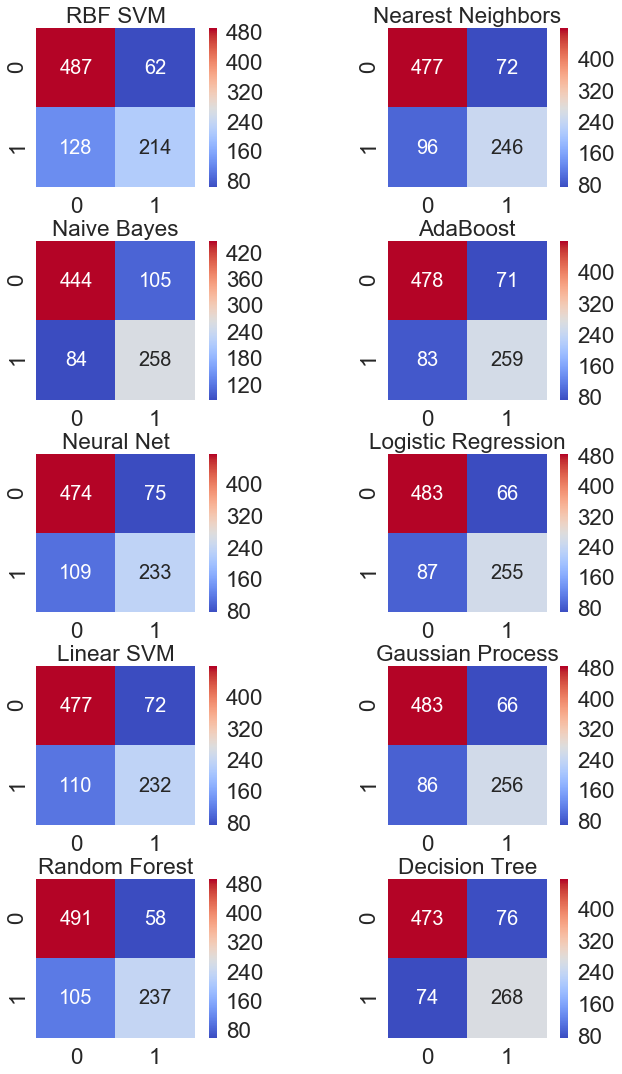

In [613]:
fig, axes = plt.subplots(5,2, figsize=(10,15))
# Adjust padding between plots
plt.tight_layout()

counter=0
for clf_name in sorted(names, key=lambda x: (results[x]['Score'])):
    sns.heatmap(results[clf_name]['Confusion_matrix'],
                ax=axes[counter % 5, math.floor(counter / 5)],
                annot=True,
                fmt='2.0f',
                square=True,
                annot_kws={"size": 20},
                cmap="coolwarm")
    axes[counter % 5, math.floor(counter / 5)].set_title(clf_name)
    counter += 1

Heatmaps showed us, `Decision Tree` model has the best performance in predicting survivals and `Neural Net` and `Random Forest` models both have a higher chance in correctly predicting dead passengers.

What we are going to do next is selecting `Random Forest` and tuning their hyperparameters by using `GridSearchCV`.

In [52]:
# Setting values for hyperparameters
hyper_params={'max_depth':range(1,21,3),
              'min_samples_split':range(2,10,2),
              'min_samples_leaf':range(1,5,2),
              'max_leaf_nodes':range(2,30,2)}


grid = GridSearchCV(RandomForestClassifier(random_state=1),
                   param_grid=hyper_params)

grid.fit(X,y)
print('Best Score: {:.4f}'.format(grid.best_score_))

print('Best Parameters setting:',grid.best_params_)

Best Score: 0.8350
Best Parameters setting: {'max_depth': 7, 'max_leaf_nodes': 18, 'min_samples_leaf': 1, 'min_samples_split': 6}


We boosted the model and reached to the accuracy of 83%. Now we got ready to use the model on the competition test dataset and export the dataframe: 

In [205]:
ranfor_model = RandomForestClassifier(random_state=1,
                                      max_depth=10, 
                                      max_leaf_nodes=10, 
                                      min_samples_leaf=2, 
                                      min_samples_split=2)

y_pred = cross_val_predict(ranfor_model, test_df_new)

TypeError: fit() missing 1 required positional argument: 'y'

In [57]:
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier(learning_rate =0.01, 
                      n_estimators=5000, 
                      max_depth=4,
                      min_child_weight=5, 
                      gamma=0, 
                      subsample=0.8, 
                      colsample_bytree=0.95,
                      reg_alpha=1e-05,
                      objective= 'binary:logistic', 
                      nthread=4, 
                      scale_pos_weight=1, 
                      seed=29)
model.fit(X, y)

# make predictions for test data
y_pred = model.predict(test_df_new)
#predictions = [round(value) for value in y_pred]

# # evaluate predictions
#accuracy = metrics.accuracy_score(y, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

submission = pd.DataFrame({
    "PassengerId": range(892,1310),
    "Survived": y_pred
})
submission.to_csv('titanic.csv', index=False)

/Users/mark4a/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [45]:
# import TPOT
from tpot import TPOTClassifier

tpot_config = {
    'sklearn.tree.DecisionTreeClassifier': {
        'criterion': ["gini", "entropy"],
        'max_depth': range(1, 20),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21),
        'max_leaf_nodes': range(2,21)
    },
}

# create instance
pipeline_optimizer = TPOTClassifier(max_time_mins=10, 
                                    n_jobs = -1, 
                                    random_state=42, 
                                    verbosity=2, 
                                    cv=3,
                                    config_dict=tpot_config)

# fit TPOT on the train data
# commented out after the run
pipeline_optimizer.fit(X, y)

# export optimized code
# commented out after the run
pipeline_optimizer.export('tpot_titanic_pipeline.py')

# import libraries
from sklearn.pipeline import make_pipeline

# create the pipeline from TPOT
# original pipeline inluded a Binarizer and RBFSampler which scored only 0.78947 
exported_pipeline = make_pipeline(
    RandomForestClassifier(random_state=1,
                          max_depth=10, 
                          max_leaf_nodes=10, 
                          min_samples_leaf=2, 
                          min_samples_split=2)
)

# fit the pipeline on the train data
exported_pipeline.fit(X, y)

exported_pipeline.score(X,y)

# predict on the test data
y_pred = exported_pipeline.predict(test_df_new)

#print(results)

Optimization Progress: 100%|██████████| 200/200 [00:03<00:00, 59.90pipeline/s]

Generation 1 - Current best internal CV score: 0.8327721661054994


Optimization Progress: 100%|██████████| 300/300 [00:04<00:00, 65.33pipeline/s]

Generation 2 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 400/400 [00:06<00:00, 62.06pipeline/s]

Generation 3 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 500/500 [00:08<00:00, 58.23pipeline/s]

Generation 4 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 600/600 [00:10<00:00, 65.81pipeline/s]

Generation 5 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 700/700 [00:12<00:00, 59.81pipeline/s]

Generation 6 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 800/800 [00:13<00:00, 58.97pipeline/s]

Generation 7 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 900/900 [00:15<00:00, 58.90pipeline/s]

Generation 8 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 1000/1000 [00:17<00:00, 59.43pipeline/s]

Generation 9 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 1100/1100 [00:19<00:00, 57.90pipeline/s]

Generation 10 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 1200/1200 [00:21<00:00, 62.80pipeline/s]

Generation 11 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 1300/1300 [00:22<00:00, 64.51pipeline/s]

Generation 12 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 1400/1400 [00:24<00:00, 61.58pipeline/s]

Generation 13 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 1500/1500 [00:26<00:00, 59.46pipeline/s]

Generation 14 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 1600/1600 [00:28<00:00, 60.21pipeline/s]

Generation 15 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 1700/1700 [00:30<00:00, 59.78pipeline/s]

Generation 16 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 1800/1800 [00:32<00:00, 57.69pipeline/s]

Generation 17 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 1900/1900 [00:34<00:00, 58.38pipeline/s]

Generation 18 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 2000/2000 [00:36<00:00, 59.12pipeline/s]

Generation 19 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 2100/2100 [00:37<00:00, 57.85pipeline/s]

Generation 20 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 2200/2200 [00:39<00:00, 64.64pipeline/s]

Generation 21 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 2300/2300 [00:41<00:00, 58.12pipeline/s]

Generation 22 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 2400/2400 [00:43<00:00, 55.38pipeline/s]

Generation 23 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 2500/2500 [00:45<00:00, 62.29pipeline/s]

Generation 24 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 2600/2600 [00:47<00:00, 57.03pipeline/s]

Generation 25 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 2700/2700 [00:49<00:00, 46.13pipeline/s]

Generation 26 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 2800/2800 [00:51<00:00, 42.47pipeline/s]

Generation 27 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 2900/2900 [00:54<00:00, 43.85pipeline/s]

Generation 28 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 3000/3000 [00:56<00:00, 58.34pipeline/s]

Generation 29 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 3100/3100 [00:58<00:00, 47.53pipeline/s]

Generation 30 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 3200/3200 [01:00<00:00, 45.58pipeline/s]

Generation 31 - Current best internal CV score: 0.8350168350168351


Optimization Progress: 100%|██████████| 3300/3300 [01:03<00:00, 53.10pipeline/s]

Generation 32 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 3400/3400 [01:05<00:00, 46.03pipeline/s]

Generation 33 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 3500/3500 [01:07<00:00, 50.60pipeline/s]

Generation 34 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 3600/3600 [01:09<00:00, 59.29pipeline/s]

Generation 35 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 3700/3700 [01:11<00:00, 50.04pipeline/s]

Generation 36 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 3800/3800 [01:13<00:00, 53.67pipeline/s]

Generation 37 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 3900/3900 [01:15<00:00, 45.00pipeline/s]

Generation 38 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 4000/4000 [01:18<00:00, 47.88pipeline/s]

Generation 39 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 4100/4100 [01:20<00:00, 52.15pipeline/s]

Generation 40 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 4200/4200 [01:22<00:00, 47.47pipeline/s]

Generation 41 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 4300/4300 [01:24<00:00, 52.15pipeline/s]

Generation 42 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 4400/4400 [01:27<00:00, 48.33pipeline/s]

Generation 43 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 4500/4500 [01:29<00:00, 49.86pipeline/s]

Generation 44 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 4600/4600 [01:31<00:00, 44.40pipeline/s]

Generation 45 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 4700/4700 [01:34<00:00, 47.18pipeline/s]

Generation 46 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 4800/4800 [01:36<00:00, 46.78pipeline/s]

Generation 47 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 4900/4900 [01:39<00:00, 48.12pipeline/s]

Generation 48 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 5000/5000 [01:41<00:00, 44.81pipeline/s]

Generation 49 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 5100/5100 [01:43<00:00, 49.95pipeline/s]

Generation 50 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 5200/5200 [01:46<00:00, 52.44pipeline/s]

Generation 51 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 5300/5300 [01:48<00:00, 47.32pipeline/s]

Generation 52 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 5400/5400 [01:51<00:00, 43.24pipeline/s]

Generation 53 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 5500/5500 [01:54<00:00, 43.08pipeline/s]

Generation 54 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 5600/5600 [01:56<00:00, 39.02pipeline/s]

Generation 55 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 5700/5700 [01:58<00:00, 51.72pipeline/s]

Generation 56 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 5800/5800 [02:00<00:00, 51.56pipeline/s]

Generation 57 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 5900/5900 [02:03<00:00, 44.95pipeline/s]

Generation 58 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 6000/6000 [02:05<00:00, 41.09pipeline/s]

Generation 59 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 6100/6100 [02:08<00:00, 50.33pipeline/s]

Generation 60 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 6200/6200 [02:10<00:00, 39.60pipeline/s]

Generation 61 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 6300/6300 [02:13<00:00, 40.37pipeline/s]

Generation 62 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 6400/6400 [02:15<00:00, 49.24pipeline/s]

Generation 63 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 6500/6500 [02:17<00:00, 52.88pipeline/s]

Generation 64 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 6600/6600 [02:20<00:00, 44.25pipeline/s]

Generation 65 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 6700/6700 [02:23<00:00, 42.12pipeline/s]

Generation 66 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 6800/6800 [02:26<00:00, 41.83pipeline/s]

Generation 67 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 6900/6900 [02:28<00:00, 42.17pipeline/s]

Generation 68 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 7000/7000 [02:31<00:00, 41.81pipeline/s]

Generation 69 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 7100/7100 [02:34<00:00, 35.85pipeline/s]

Generation 70 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 7200/7200 [02:36<00:00, 39.65pipeline/s]

Generation 71 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 7300/7300 [02:39<00:00, 40.77pipeline/s]

Generation 72 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 7400/7400 [02:42<00:00, 46.68pipeline/s]

Generation 73 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 7500/7500 [02:44<00:00, 38.52pipeline/s]

Generation 74 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 7600/7600 [02:47<00:00, 44.93pipeline/s]

Generation 75 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 7700/7700 [02:49<00:00, 40.98pipeline/s]

Generation 76 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 7800/7800 [02:52<00:00, 52.20pipeline/s]

Generation 77 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 7900/7900 [02:54<00:00, 40.97pipeline/s]

Generation 78 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 8000/8000 [02:57<00:00, 50.36pipeline/s]

Generation 79 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 8100/8100 [02:59<00:00, 39.35pipeline/s]

Generation 80 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 8200/8200 [03:01<00:00, 44.61pipeline/s]

Generation 81 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 8300/8300 [03:04<00:00, 40.69pipeline/s]

Generation 82 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 8400/8400 [03:06<00:00, 52.38pipeline/s]

Generation 83 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 8500/8500 [03:09<00:00, 46.93pipeline/s]

Generation 84 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 8600/8600 [03:11<00:00, 41.32pipeline/s]

Generation 85 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 8700/8700 [03:14<00:00, 47.47pipeline/s]

Generation 86 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 8800/8800 [03:16<00:00, 51.29pipeline/s]

Generation 87 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 8900/8900 [03:19<00:00, 46.33pipeline/s]

Generation 88 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 9000/9000 [03:22<00:00, 37.12pipeline/s]

Generation 89 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 9100/9100 [03:25<00:00, 43.24pipeline/s]

Generation 90 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 9200/9200 [03:27<00:00, 36.50pipeline/s]

Generation 91 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 9300/9300 [03:30<00:00, 41.92pipeline/s]

Generation 92 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 9400/9400 [03:32<00:00, 46.45pipeline/s]

Generation 93 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 9500/9500 [03:35<00:00, 41.13pipeline/s]

Generation 94 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 9600/9600 [03:37<00:00, 42.18pipeline/s]

Generation 95 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 9700/9700 [03:40<00:00, 40.96pipeline/s]

Generation 96 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 9800/9800 [03:43<00:00, 46.04pipeline/s]

Generation 97 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 9900/9900 [03:45<00:00, 35.08pipeline/s]

Generation 98 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 10000/10000 [03:48<00:00, 41.13pipeline/s]

Generation 99 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 10100/10100 [03:51<00:00, 41.86pipeline/s]

Generation 100 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 10200/10200 [03:53<00:00, 40.59pipeline/s]

Generation 101 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 10300/10300 [03:56<00:00, 46.17pipeline/s]

Generation 102 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 10400/10400 [03:59<00:00, 42.02pipeline/s]

Generation 103 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 10500/10500 [04:02<00:00, 41.64pipeline/s]

Generation 104 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 10600/10600 [04:04<00:00, 34.60pipeline/s]

Generation 105 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 10700/10700 [04:07<00:00, 44.11pipeline/s]

Generation 106 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 10800/10800 [04:10<00:00, 35.59pipeline/s]

Generation 107 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 10900/10900 [04:12<00:00, 39.94pipeline/s]

Generation 108 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 11000/11000 [04:15<00:00, 43.54pipeline/s]

Generation 109 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 11100/11100 [04:18<00:00, 36.21pipeline/s]

Generation 110 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 11200/11200 [04:21<00:00, 45.34pipeline/s]

Generation 111 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 11300/11300 [04:24<00:00, 35.92pipeline/s]

Generation 112 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 11400/11400 [04:27<00:00, 43.58pipeline/s]

Generation 113 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 11500/11500 [04:29<00:00, 35.11pipeline/s]

Generation 114 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 11600/11600 [04:32<00:00, 44.41pipeline/s]

Generation 115 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 11700/11700 [04:35<00:00, 41.64pipeline/s]

Generation 116 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 11800/11800 [04:38<00:00, 40.17pipeline/s]

Generation 117 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 11900/11900 [04:41<00:00, 35.78pipeline/s]

Generation 118 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 12000/12000 [04:43<00:00, 43.02pipeline/s]

Generation 119 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 12100/12100 [04:46<00:00, 39.89pipeline/s]

Generation 120 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 12200/12200 [04:49<00:00, 38.68pipeline/s]

Generation 121 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 12300/12300 [04:53<00:00, 36.16pipeline/s]

Generation 122 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 12400/12400 [04:56<00:00, 40.22pipeline/s]

Generation 123 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 12500/12500 [04:59<00:00, 39.92pipeline/s]

Generation 124 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 12600/12600 [05:01<00:00, 40.78pipeline/s]

Generation 125 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 12700/12700 [05:04<00:00, 39.93pipeline/s]

Generation 126 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 12800/12800 [05:07<00:00, 40.29pipeline/s]

Generation 127 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 12900/12900 [05:10<00:00, 33.53pipeline/s]

Generation 128 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 13000/13000 [05:13<00:00, 42.99pipeline/s]

Generation 129 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 13100/13100 [05:16<00:00, 40.94pipeline/s]

Generation 130 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 13200/13200 [05:19<00:00, 39.58pipeline/s]

Generation 131 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 13300/13300 [05:22<00:00, 39.05pipeline/s]

Generation 132 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 13400/13400 [05:25<00:00, 38.78pipeline/s]

Generation 133 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 13500/13500 [05:28<00:00, 39.69pipeline/s]

Generation 134 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 13600/13600 [05:31<00:00, 40.25pipeline/s]

Generation 135 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 13700/13700 [05:34<00:00, 39.61pipeline/s]

Generation 136 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 13800/13800 [05:37<00:00, 38.34pipeline/s]

Generation 137 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 13900/13900 [05:40<00:00, 39.32pipeline/s]

Generation 138 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 14000/14000 [05:43<00:00, 38.63pipeline/s]

Generation 139 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 14100/14100 [05:46<00:00, 38.48pipeline/s]

Generation 140 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 14200/14200 [05:50<00:00, 37.31pipeline/s]

Generation 141 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 14300/14300 [05:53<00:00, 38.03pipeline/s]

Generation 142 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 14400/14400 [05:56<00:00, 38.93pipeline/s]

Generation 143 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 14500/14500 [05:59<00:00, 39.91pipeline/s]

Generation 144 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 14600/14600 [06:01<00:00, 32.43pipeline/s]

Generation 145 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 14700/14700 [06:04<00:00, 38.77pipeline/s]

Generation 146 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 14800/14800 [06:07<00:00, 43.33pipeline/s]

Generation 147 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 14900/14900 [06:10<00:00, 38.67pipeline/s]

Generation 148 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 15000/15000 [06:13<00:00, 38.27pipeline/s]

Generation 149 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 15100/15100 [06:16<00:00, 31.25pipeline/s]

Generation 150 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 15200/15200 [06:19<00:00, 42.22pipeline/s]

Generation 151 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 15300/15300 [06:23<00:00, 36.12pipeline/s]

Generation 152 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 15400/15400 [06:26<00:00, 37.41pipeline/s]

Generation 153 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 15500/15500 [06:29<00:00, 39.09pipeline/s]

Generation 154 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 15600/15600 [06:32<00:00, 39.74pipeline/s]

Generation 155 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 15700/15700 [06:35<00:00, 39.10pipeline/s]

Generation 156 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 15800/15800 [06:38<00:00, 38.73pipeline/s]

Generation 157 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 15900/15900 [06:41<00:00, 34.44pipeline/s]

Generation 158 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 16000/16000 [06:44<00:00, 40.32pipeline/s]

Generation 159 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 16100/16100 [06:47<00:00, 37.60pipeline/s]

Generation 160 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 16200/16200 [06:50<00:00, 37.22pipeline/s]

Generation 161 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 16300/16300 [06:53<00:00, 34.33pipeline/s]

Generation 162 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 16400/16400 [06:57<00:00, 36.35pipeline/s]

Generation 163 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 16500/16500 [07:00<00:00, 35.88pipeline/s]

Generation 164 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 16600/16600 [07:03<00:00, 30.20pipeline/s]

Generation 165 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 16700/16700 [07:06<00:00, 42.02pipeline/s]

Generation 166 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 16800/16800 [07:09<00:00, 38.29pipeline/s]

Generation 167 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 16900/16900 [07:12<00:00, 37.00pipeline/s]

Generation 168 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 17000/17000 [07:15<00:00, 30.68pipeline/s]

Generation 169 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 17100/17100 [07:18<00:00, 42.07pipeline/s]

Generation 170 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 17200/17200 [07:21<00:00, 33.15pipeline/s]

Generation 171 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 17300/17300 [07:24<00:00, 37.30pipeline/s]

Generation 172 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 17400/17400 [07:27<00:00, 42.50pipeline/s]

Generation 173 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 17500/17500 [07:30<00:00, 38.67pipeline/s]

Generation 174 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 17600/17600 [07:33<00:00, 30.75pipeline/s]

Generation 175 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 17700/17700 [07:36<00:00, 41.66pipeline/s]

Generation 176 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 17800/17800 [07:40<00:00, 37.51pipeline/s]

Generation 177 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 17900/17900 [07:43<00:00, 33.37pipeline/s]

Generation 178 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 18000/18000 [07:46<00:00, 35.26pipeline/s]

Generation 179 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 18100/18100 [07:50<00:00, 37.03pipeline/s]

Generation 180 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 18200/18200 [07:53<00:00, 33.77pipeline/s]

Generation 181 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 18300/18300 [07:57<00:00, 33.82pipeline/s]

Generation 182 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 18400/18400 [08:00<00:00, 38.75pipeline/s]

Generation 183 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 18500/18500 [08:03<00:00, 38.72pipeline/s]

Generation 184 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 18600/18600 [08:06<00:00, 38.00pipeline/s]

Generation 185 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 18700/18700 [08:09<00:00, 38.56pipeline/s]

Generation 186 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 18800/18800 [08:12<00:00, 38.44pipeline/s]

Generation 187 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 18900/18900 [08:15<00:00, 38.58pipeline/s]

Generation 188 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 19000/19000 [08:18<00:00, 38.06pipeline/s]

Generation 189 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 19100/19100 [08:21<00:00, 39.10pipeline/s]

Generation 190 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 19200/19200 [08:25<00:00, 36.83pipeline/s]

Generation 191 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 19300/19300 [08:28<00:00, 34.28pipeline/s]

Generation 192 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 19400/19400 [08:31<00:00, 34.69pipeline/s]

Generation 193 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 19500/19500 [08:34<00:00, 36.70pipeline/s]

Generation 194 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 19600/19600 [08:38<00:00, 37.35pipeline/s]

Generation 195 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 19700/19700 [08:41<00:00, 37.68pipeline/s]

Generation 196 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 19800/19800 [08:44<00:00, 36.30pipeline/s]

Generation 197 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 19900/19900 [08:47<00:00, 37.00pipeline/s]

Generation 198 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 20000/20000 [08:51<00:00, 35.86pipeline/s]

Generation 199 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 20100/20100 [08:54<00:00, 34.85pipeline/s]

Generation 200 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 20200/20200 [08:57<00:00, 34.14pipeline/s]

Generation 201 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 20300/20300 [09:00<00:00, 36.01pipeline/s]

Generation 202 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 20400/20400 [09:04<00:00, 30.73pipeline/s]

Generation 203 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 20500/20500 [09:07<00:00, 41.03pipeline/s]

Generation 204 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 20600/20600 [09:10<00:00, 33.74pipeline/s]

Generation 205 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 20700/20700 [09:13<00:00, 35.17pipeline/s]

Generation 206 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 20800/20800 [09:17<00:00, 36.06pipeline/s]

Generation 207 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 20900/20900 [09:20<00:00, 35.75pipeline/s]

Generation 208 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 21000/21000 [09:24<00:00, 32.26pipeline/s]

Generation 209 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 21100/21100 [09:27<00:00, 34.76pipeline/s]

Generation 210 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 21200/21200 [09:30<00:00, 37.89pipeline/s]

Generation 211 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 21300/21300 [09:34<00:00, 31.22pipeline/s]

Generation 212 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 21400/21400 [09:38<00:00, 29.75pipeline/s]

Generation 213 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 21500/21500 [09:41<00:00, 32.73pipeline/s]

Generation 214 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 21600/21600 [09:45<00:00, 34.97pipeline/s]

Generation 215 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 21700/21700 [09:48<00:00, 33.83pipeline/s]

Generation 216 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 21800/21800 [09:52<00:00, 34.16pipeline/s]

Generation 217 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 21900/21900 [09:55<00:00, 36.92pipeline/s]

Generation 218 - Current best internal CV score: 0.8361391694725029


Optimization Progress: 100%|██████████| 22000/22000 [09:58<00:00, 33.27pipeline/s]

Generation 219 - Current best internal CV score: 0.8361391694725029



10.004653450000001 minutes have elapsed. TPOT will close down.
TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: DecisionTreeClassifier(CombineDFs(CombineDFs(CombineDFs(input_matrix, input_matrix), input_matrix), DecisionTreeClassifier(input_matrix, criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_leaf=19, min_samples_split=9)), criterion=entropy, max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=6)


In [95]:
submission = pd.DataFrame({
    "PassengerId": range(892,1310),
    "Survived": y_pred
})
submission.to_csv('titanic.csv', index=False)

In [101]:
import numpy as np
import pandas as pd
from sklearn.decomposition import FastICA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the class is labeled 'target' in the data file
#tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
#features = tpot_data.drop('target', axis=1).values
features = X
# training_features, testing_features, training_target, testing_target = \
#             train_test_split(features, tpot_data['target'].values, random_state=42)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, y.values, random_state=42)


# Score on the training set was:0.8507547555896953
exported_pipeline = make_pipeline(
    make_union(
        StackingEstimator(estimator=DecisionTreeClassifier(criterion="gini", max_depth=2, min_samples_leaf=16, min_samples_split=11)),
        make_pipeline(
            StackingEstimator(estimator=DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_leaf=2, min_samples_split=8)),
            FastICA(tol=0.9)
        )
    ),
    StackingEstimator(estimator=ExtraTreesClassifier(bootstrap=True, criterion="entropy", max_features=0.5, min_samples_leaf=10, min_samples_split=17, n_estimators=100)),
    LinearSVC(C=15.0, dual=True, loss="squared_hinge", penalty="l2", tol=0.001)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(test_df_new)


In [103]:
len(results)

418

In [104]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.tree import DecisionTreeClassifier
from tpot.builtins import StackingEstimator
from sklearn.preprocessing import FunctionTransformer
from copy import copy

# NOTE: Make sure that the class is labeled 'target' in the data file
#tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = X
#features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, y.values, random_state=42)
#
# Score on the training set was:0.8361391694725029
exported_pipeline = make_pipeline(
    make_union(
        make_union(
            make_union(
                FunctionTransformer(copy),
                FunctionTransformer(copy)
            ),
            FunctionTransformer(copy)
        ),
        StackingEstimator(estimator=DecisionTreeClassifier(criterion="entropy", max_depth=5, max_leaf_nodes=5, min_samples_leaf=19, min_samples_split=9))
    ),
    DecisionTreeClassifier(criterion="entropy", max_depth=3, max_leaf_nodes=16, min_samples_leaf=1, min_samples_split=6)
)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [105]:
len(results)

223

In [99]:
submission = pd.DataFrame({
    "PassengerId": range(892,1310),
    "Survived": results
})
submission.to_csv('titanic.csv', index=False)

ValueError: arrays must all be same length